<a href="https://colab.research.google.com/github/ciciwu/DNN-playground/blob/master/MNIST_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cpu')

In [5]:
input_size = 28*28
hidden_size=100
num_classes=10
num_epochs = 3
batch_size=100
learning_rate=0.001

In [10]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,
                                          transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,
                                          transform=transforms.ToTensor(),download=True)

In [11]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True,batch_size=batch_size)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset, shuffle=True,batch_size=batch_size)

In [12]:
example=iter(train_loader)
samples,labels=next(example)

In [14]:
samples.shape

torch.Size([100, 1, 28, 28])

In [16]:
labels.shape

torch.Size([100])

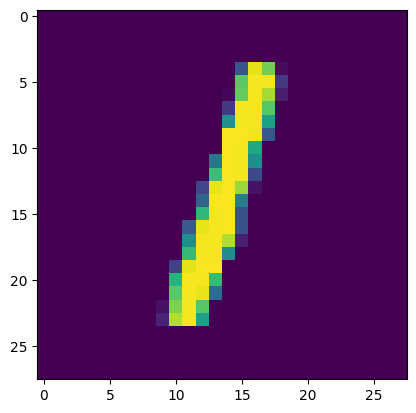

In [19]:
plt.imshow(samples[0][0])

In [22]:
class Model(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(Model,self).__init__()
    self.net = nn.Sequential(
     nn.Linear(input_size,hidden_size),
     nn.ReLU(),
     nn.Linear(hidden_size,num_classes)
    )

  def forward(self,x):
    out = self.net(x)
    return out




In [23]:
model = Model(input_size,hidden_size,num_classes)


In [26]:
model.net

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)

In [27]:
criterion= nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)


In [30]:
for i in range(num_epochs):
  for j,(samples,labels) in enumerate(train_loader):
    samples = samples.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    pred = model(samples)
    loss = criterion(pred,labels)
    loss.backward()
    optimizer.step()

  print(f'epech {i}, loss {loss.item() : 5}')

epech 0, loss  0.2596795856952667
epech 1, loss  0.0984291136264801


tensor([ -3.5006,  -3.2467,   0.7402,  -2.7443,  -3.1681,   0.0352,  12.0011,
        -10.6734,   0.7583,  -9.2267])
accuracy :  97.000000
tensor([-2.7431, -0.9651, -4.6142, -0.9054, -3.3309,  2.9572, -4.8330, -2.6312,
         0.1417, -2.7951])
accuracy :  97.500000
tensor([ -2.7888,  -4.2266,  -2.6860,   9.5096, -10.3991,   1.4597, -11.4586,
         -6.6384,  -1.1502,  -2.6102])
accuracy :  98.000000
tensor([-2.3688, -2.9620,  2.8519, -2.4043, -1.9475, -3.2303,  7.7223, -6.7283,
         0.8281, -3.9050])
accuracy :  97.000000
tensor([ -3.3620, -11.1377,  -3.3711,  -3.3678,  -5.8494,  -3.2411, -15.4755,
          9.1908,  -3.8715,   0.8436])
accuracy :  96.800000
tensor([ -5.0804,  -2.6980,   1.4023,  -1.7931,  -8.6722,  -0.5877,   2.1163,
        -11.0247,   8.3746,  -6.2098])
accuracy :  97.166667
tensor([-1.9263, -9.5060, -1.8574, -5.8742,  2.9606,  0.8834,  0.2281, -6.2386,
         5.6225, -1.9667])
accuracy :  97.000000
tensor([ -3.8947, -11.6063,  -2.9399,  -8.8096,  10.4338,

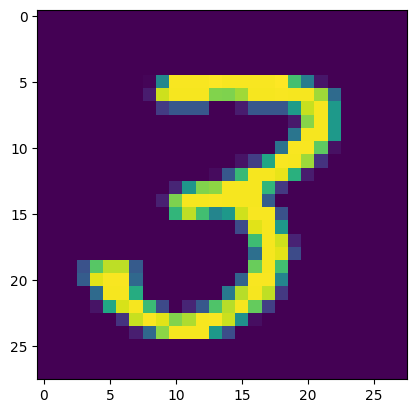

In [33]:
with torch.no_grad():
  n_correct=0
  n_samples=0
  for samples,labels in test_loader:
    plt.imshow(samples[0][0])
    samples = samples.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    scores = model(samples)
    print(scores[0])
  # val, idx


    _,predictions = torch.max(scores,1)
    n_samples += labels.shape[0]
    n_correct +=(predictions==labels).sum().item()
    acc = 100.0 *n_correct/n_samples
    print(f'accuracy : { acc: 5f}')

